### Aprendizagem Bayesiana
<br />

- Baseado numa abordagem probabilística (Teorema de Bayes)
- Constroi por meio de uma tabela histórica e cria uma tabela de probabilidade
- Para probabilidades com valores zerados, utiliza-se o artifício da **Correção Laplaciana** para a correção desses valores, substituindo-os por novas probabilidades (quantas forem necessárias) para que haja essa correção

- _Vantagem_ : Rápido, Simplicidade para Interpretação, Altas Dimensões, Boas previsões para bases de dados pequenas  (ap. 250 registros)

- _Desvantagem_ : Trata cada atributo de forma independente. O que nem sempre é verdade.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
base_risco_credit = pd.read_csv('risco_credito.csv')
base_risco_credit.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [3]:
X_risco_credito = base_risco_credit.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [4]:
y_risco_credito = base_risco_credit.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [5]:
# transformando as variáveis categóricas em numéricas

from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [6]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [7]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [8]:
from sklearn.naive_bayes import GaussianNB

# Link para saber mais sobre o Teorema de Bayes
# https://pt.wikipedia.org/wiki/Teorema_de_Bayes

naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [9]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [10]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [11]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [12]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [13]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [14]:
import pickle
with open('credit_base.pkl', mode='rb') as f:
    X_treinamento, y_treinamento, X_teste, y_teste = pickle.load(f)

In [15]:
X_treinamento.shape, y_treinamento.shape

((1500, 3), (1500,))

In [16]:
X_teste.shape, y_teste.shape

((500, 3), (500,))

In [17]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_treinamento, y_treinamento)

GaussianNB()

In [18]:
previsoes = naive_credit_data.predict(X_teste)

# Comparadno as previsões, que utilizaram o X_teste com o y_teste
previsoes, y_teste

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# Dos 500 registros, o algoritmo acertou 93% dos dados. 
# O accuracy_score recebe como parâmetros o valor de y_test com as previsões

accuracy_score(y_teste, previsoes)

0.938

In [21]:
confusion_matrix(y_teste, previsoes)
# 428 pagam e foram classificados como pagantes, e o número são so que pagam mas foram 
# classificados como não pagantes

# Agora, 23 clientes foram classificados como pagantes enquanto eles não são pagantes
# E o algoritmo acertou os clientes que não pagam como não pagantes (41)

# 0  [428, 8]
# 1  [23, 41]

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [22]:
from yellowbrick.classifier import ConfusionMatrix

0.938

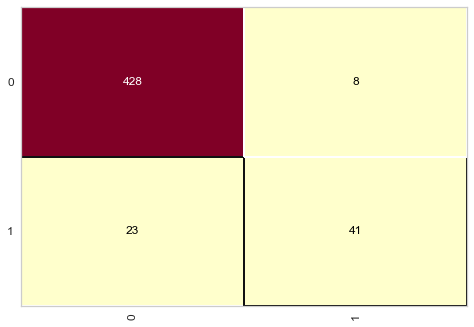

In [23]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [24]:
# Baixo desempenho para classificar os clientes que não pagam.

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [25]:
with open('census_base.pkl', mode='rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [26]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [27]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [28]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)

In [29]:
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [30]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [31]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

0.4767656090071648

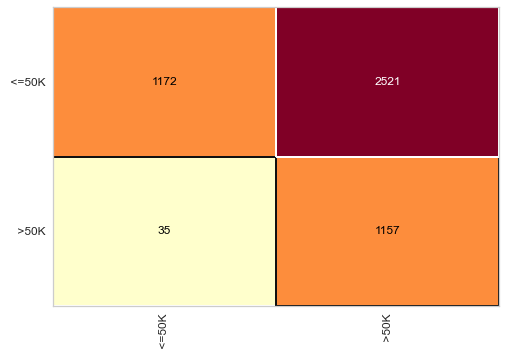

In [32]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_teste)
cm.score(X_census_teste, y_census_teste)

In [33]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



### Aprendizagem por Árvore de decisão 
<br />
- Utiliza como forma para classificar os atributos mais importantes o cálculo da Entropy (S) e o Gain (S,A)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
with open('risco_credito.pkl', mode='rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [36]:
X_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [37]:
arvore_risco_credio = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credio.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [38]:
arvore_risco_credio.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

[Text(0.5, 0.9, 'rendas <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'rendas <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'história de crédito <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4, 0.3, 'dívida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'história de crédito <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.7, 0.5, 'história de crédito <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue 

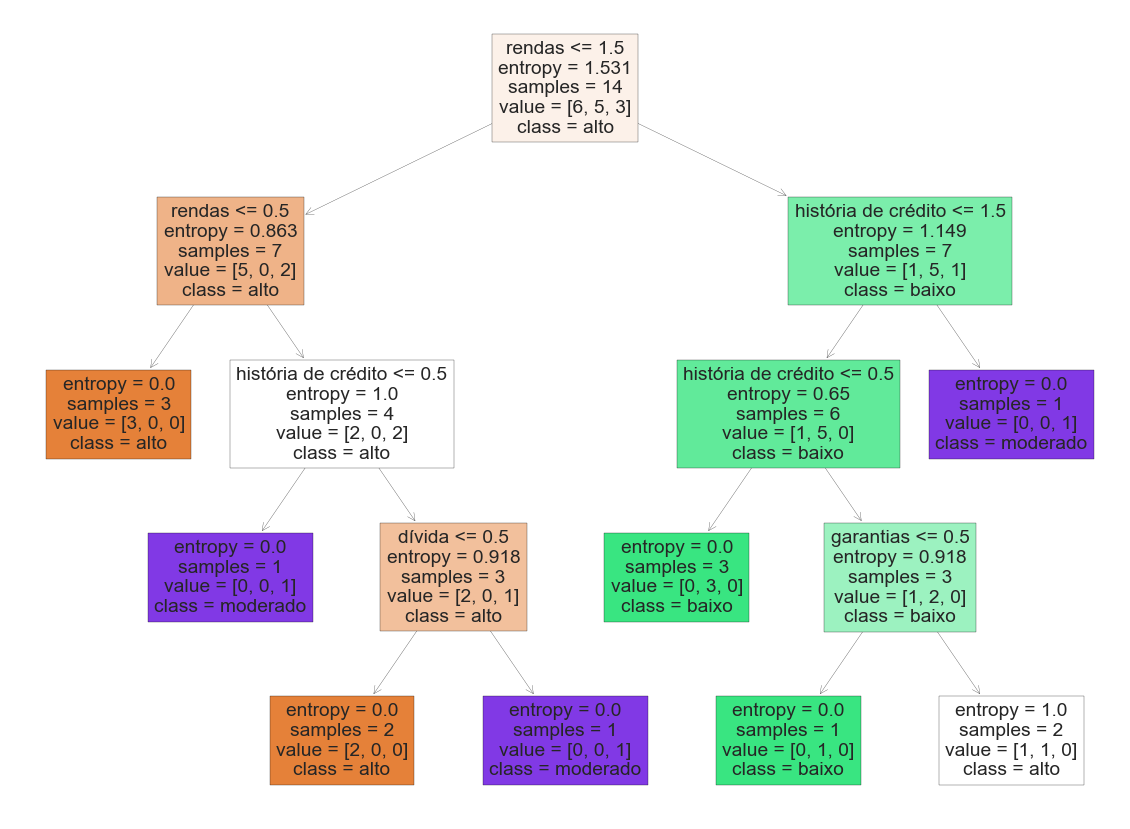

In [39]:
from sklearn import tree
previsores = ['história de crédito', 'dívida', 'garantias', 'rendas']
figura, eixos = plt.subplots(figsize=(20,15),nrows=1, ncols=1)
tree.plot_tree(arvore_risco_credio, feature_names=previsores, 
               class_names=arvore_risco_credio.classes_, filled=True)

In [40]:
with open('credit_base.pkl', mode='rb') as f:
    X_treinamento, y_treinamento, X_teste, y_teste = pickle.load(f)

In [41]:
X_treinamento.shape, X_teste.shape

((1500, 3), (500, 3))

In [42]:
y_treinamento.shape, y_teste.shape

((1500,), (500,))

In [43]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
arvore_credit.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
previsoes = arvore_credit.predict(X_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
accuracy_score(y_teste, previsoes)

0.982

0.982

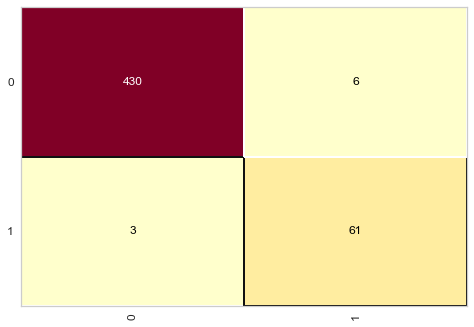

In [48]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [49]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [50]:
arvore_credit.classes_

array([0, 1], dtype=int64)

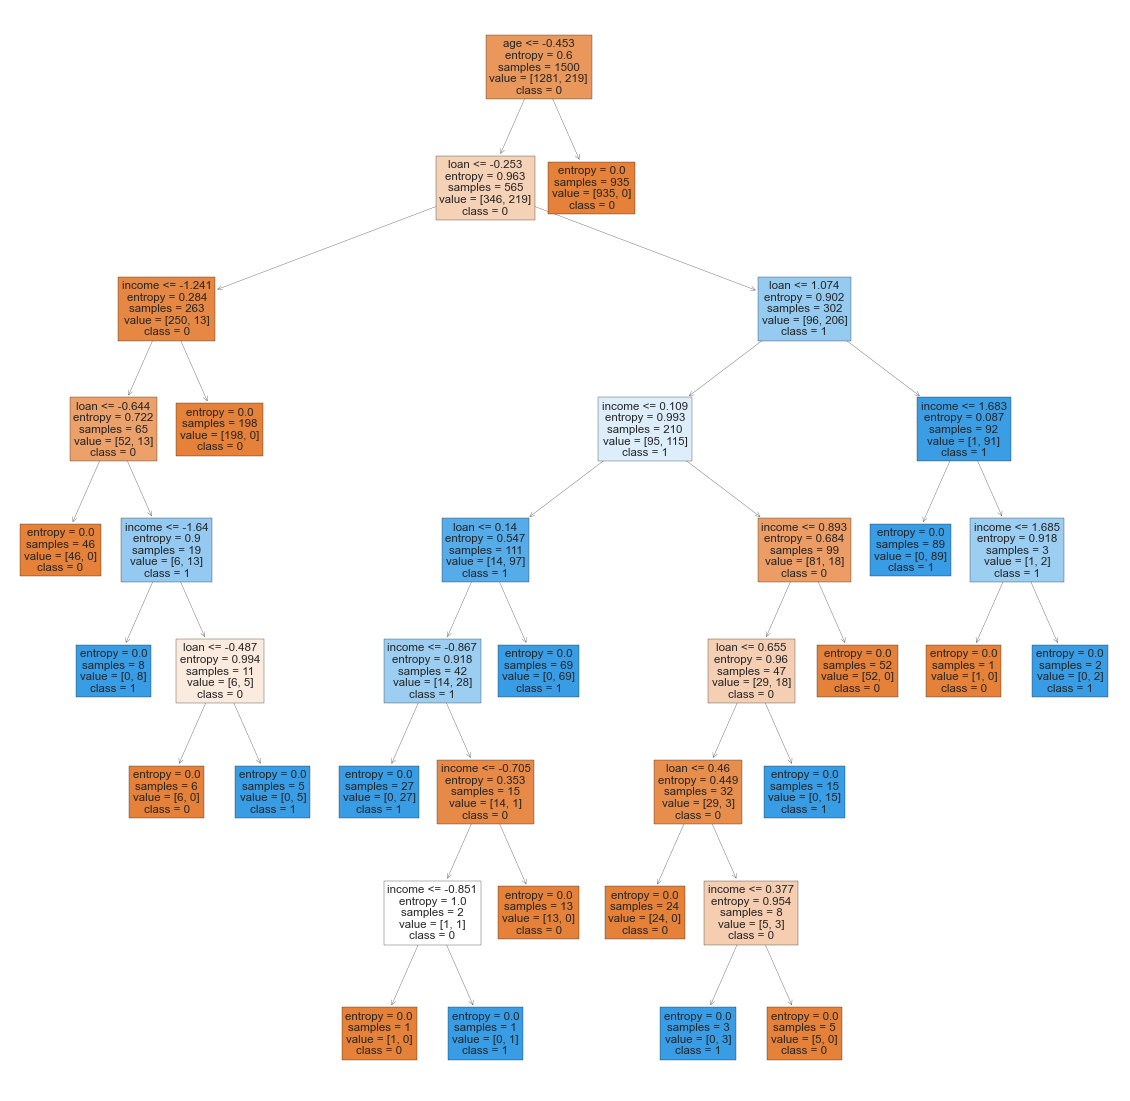

In [51]:
from sklearn import tree

previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(figsize=(20,20), ncols=1, nrows=1)

# precisamos deixar as classes apenas como strings 
tree.plot_tree(arvore_credit, feature_names=previsores, 
               class_names=['0','1'], filled=True)

# salvando a imagem
fig.savefig('arvore_credit.png')

In [52]:
with open('census_base.pkl', mode='rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [53]:
X_census_treinamento.shape

(27676, 108)

In [54]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
previsoes = arvore_census.predict(X_census_teste)

In [56]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

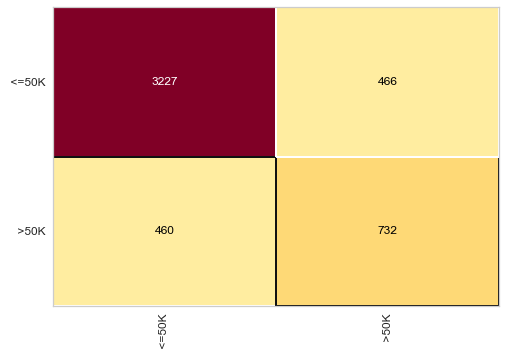

In [57]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_teste)
cm.score(X_census_teste, y_census_teste)

In [58]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



### Aprendizagem por Random Forest
<br />

- Um algoritmo que melhora um desempenho de uma árvore de decisão
- Usamos a previsão de várias árvores

<br />

* Ensemble learning (_aprendizagem em conjunto_)
* Escolha aleatória (K) _impureza de Gini_

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
with open('credit_base.pkl', 'rb') as f:  
    X_treinamento, y_treinamento, X_teste, y_teste = pickle.load(f)

In [61]:
X_treinamento.shape, X_teste.shape, y_treinamento, y_teste.shape

((1500, 3), (500, 3), array([0, 0, 0, ..., 0, 0, 0], dtype=int64), (500,))

In [62]:
# n_estimators = número de árvores que vamos criar
# criterion = vamos continuar utilizando o valor de entropia

random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_treinamento, y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [63]:
previsoes = random_forest_credit.predict(X_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.984

0.984

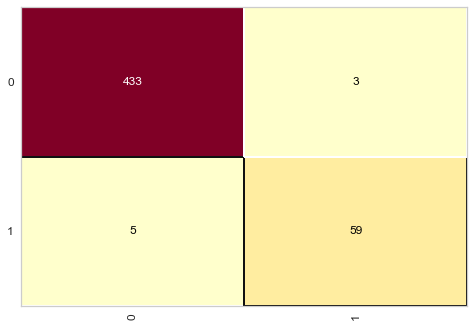

In [66]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [67]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



In [68]:
with open('census_base.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [69]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [70]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [71]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [72]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [73]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

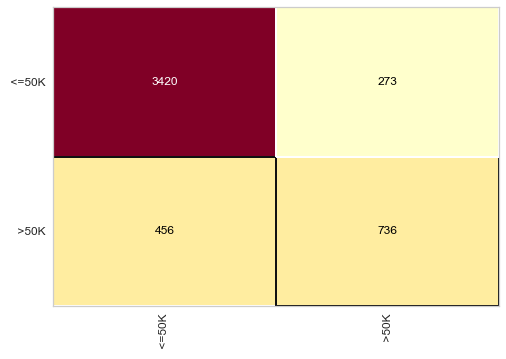

In [74]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [75]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



### Aprendizado por Regras

#### Indução de regras 
- OneR
- PRISM
- Decisão vs Regras
- Regras com CN2 (_Orange_)

##### Algoritmo OneR (One Rules)
<br />

- Testar coisas simples primeiro
- Um atributo faz todo o trabalho

In [76]:
import Orange

C:\Users\Matheus\anaconda3\lib\site-packages\pyqtgraph\colors\palette.py:1: RuntimeWarning: PyQtGraph supports Qt version >= 5.15, but 5.9.7 detected.
  from ..Qt import QtGui


In [77]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')

In [78]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [79]:
# retorna o nome das columas
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [80]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [81]:
for regras in regras_risco_credito.rule_list:
    print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [82]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0], dtype=int64)

In [83]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [84]:
for i in previsoes:
  #print(i)
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


#### Aplicando as Regras aos Bancos

In [85]:
base_risco_credito = Orange.data.Table('credit_data_regras.csv')

In [86]:
base_risco_credito.domain

[income, age, loan | default]

In [87]:
base_dividida = Orange.evaluation.testing.sample(base_risco_credito, n = 0.25)

In [88]:
base_dividida

([[46672.7, 54.5487, 1408.5 | 0],
  [61129.7, 35.1092, 11302.8 | 0],
  [28239.5, 26.1922, 4189.83 | 1],
  [46706.5, 18.8303, 7084.26 | 1],
  [23329.3, 48.577, 222.622 | 0],
  ...
 ],
 [[47007.3, 45.0198, 4069.4 | 0],
  [34145.8, 31.4008, 4074.95 | 0],
  [35916.7, 53.5404, 6401.19 | 0],
  [55603.8, 43.8395, 1411.13 | 0],
  [40069.3, 43.3135, 3646.05 | 0],
  ...
 ])

In [89]:
base_dividida[0], base_dividida[1]

([[46672.7, 54.5487, 1408.5 | 0],
  [61129.7, 35.1092, 11302.8 | 0],
  [28239.5, 26.1922, 4189.83 | 1],
  [46706.5, 18.8303, 7084.26 | 1],
  [23329.3, 48.577, 222.622 | 0],
  ...
 ],
 [[47007.3, 45.0198, 4069.4 | 0],
  [34145.8, 31.4008, 4074.95 | 0],
  [35916.7, 53.5404, 6401.19 | 0],
  [55603.8, 43.8395, 1411.13 | 0],
  [40069.3, 43.3135, 3646.05 | 0],
  ...
 ])

In [90]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [91]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [92]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [93]:
for regras in regras_credit.rule_list:
    print(regras)

IF age>=35.0154038900509 THEN default=0 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF loan>=7708.31562497011 AND loan>=9601.375482171099 THEN default=1 
IF income>=49205.6370992213 AND age>=33.8957485635765 THEN default=0 
IF income>=56846.4742321521 AND age>=33.6821509548463 THEN default=1 
IF loan<=5898.0008931423 AND age>=34.7514377613552 THEN default=1 
IF income<=49205.6370992213 AND loan>=5785.88427485782 THEN default=1 
IF loan>=7218.9682240579195 AND loan>=9595.28628892989 THEN default=0 
IF age>=34.6052206088789 THEN default=0 
IF loan>=7218.9682240579195 AND age>=33.471181642264106 THEN default=0 
IF loan>=7218.9682240579195 AND age>=24.3516025198624 THEN default=1 
IF loan>=8092.982779946221 THEN default=1 
IF income>=57596.3540980592 THEN default=0 
IF income>=32197.6207010448 AND loan>=6632.036202597321 THEN default=1 
IF income>=46024.1445619613 AND income>=50360.6787929311 THEN default=0 
IF loan<=3665.88089899456 AND income>=29724.4768752716

In [94]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, 
                                                     [lambda testdata : regras_credit])

In [95]:
previsoes

In [96]:
# Classification Accuracy
Orange.evaluation.CA(previsoes)

array([0.97])

#### Classificador Base - Majority Learning

In [97]:
base_credit_mj = Orange.data.Table('credit_data_regras.csv')

In [98]:
base_credit_mj.domain

[income, age, loan | default]

In [99]:
majority = Orange.classification.MajorityLearner()

In [100]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit_mj, base_credit_mj, [majority])

In [101]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [102]:
for registro in base_credit_mj:
    print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [103]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit_mj)

Counter({'0': 1717, '1': 283})

In [104]:
# Aplicando agora a base census
base_census = Orange.data.Table('census_regras.csv')

In [105]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [106]:
majority_census = Orange.classification.MajorityLearner()
previsoes_census = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority_census])

In [107]:
Orange.evaluation.CA(previsoes_census)
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

### Aprendizagem Baseada em Instânceas
<br />

- Algoritmo kNN (_k Nearest Neighbour_), pertencem a categoria 'Lazy' pois não geram modelos. Apenas armazenam os valores de treinamento
- Indicado para relacionamentos complexos
- Baseado na _distância_ do valor em comparação com os outros valores da base
- O valor de _k_ representa o parâmetro dos "vizinhos" mais próximos. Se o k = 1, iremos usar o valor com a menor distância; Se o valor de k = 2, pegaremos os dois valores mais próximos
- O kNN **armazena** os exemplos de treinamento
- Para valores de k pequenos, outliers e ruídos nos dados podem prejudicar o desempenho do algoritmo
- Para valores de K grandes, o algoritmo tem a tendência a classificar a classe com mais elementos. (Tendência de valor default entre 3 e 5)

- A distância utilizada, é a Distância Euclidiana: (Obs¹: existem outras formas para calcular a distância) 


$$DE(x,y) = \sqrt{ \sum_{i}^{p} {(xi - yi)^2} }$$

In [108]:
import pickle

In [109]:
with open('credit_base.pkl', 'rb') as f:  
    X_treinamento, y_treinamento, X_teste, y_teste = pickle.load(f)

In [110]:
X_treinamento.shape, X_teste.shape

((1500, 3), (500, 3))

In [111]:
y_treinamento.shape, y_teste.shape

((1500,), (500,))

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
# valor default segundo a documentação
knn_credit = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
knn_credit.fit(X_treinamento, y_treinamento)

KNeighborsClassifier()

In [114]:
previsoes = knn_credit.predict(X_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [115]:
y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [116]:
#              valor real
accuracy_score(y_teste, previsoes)

0.986

0.986

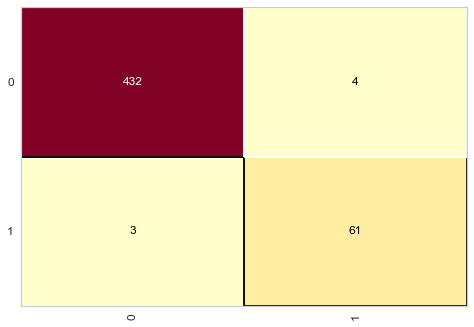

In [117]:
cm = ConfusionMatrix(knn_credit)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [118]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



##### Aplicando o Algoritmo kNN para a base census

In [119]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [120]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [121]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [122]:
# testar as previsões para a base census

### Regressão Logística
e = 2,71 ; 
p = função sigmoide

$$p = \frac{1}{x - e^{-f(x)}}$$

<br />

equação da reta

<br />

$$f(x) = b0 + b1 * x$$

<br />

_após realizarmos o cálculo da função da reta e ela ser aplicada em p, iremos utilizar o log_transformation gerando a curva sigmoide_

$$Log \frac{p}{1-p} = b0 + b1 * x$$

<br />

* Obs²: Para se encontrar os pesos referentes aos valores de B. Utiliza-se a técnica de descida do gradiente.

$$minC(B0, B1, B2 ... Bn)$$

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [125]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [126]:
y_risco_credito # 2, 7, 11

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [127]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [128]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [129]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [130]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [131]:
logistic_risco_credito.intercept_

array([-0.80828993])

In [132]:
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [133]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

In [134]:
with open('credit_base.pkl', 'rb') as f:  
    X_treinamento, y_treinamento, X_teste, y_teste = pickle.load(f)

In [135]:
logistic_credit = LogisticRegression(random_state=1)

In [136]:
logistic_credit.fit(X_treinamento, y_treinamento)

LogisticRegression(random_state=1)

In [137]:
logistic_credit.intercept_

array([-6.02976095])

In [138]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [139]:
previsoes2 = logistic_credit.predict(X_teste)

In [140]:
previsoes2, y_teste

(array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [141]:
accuracy_score(y_teste, previsoes2)

0.946

0.946

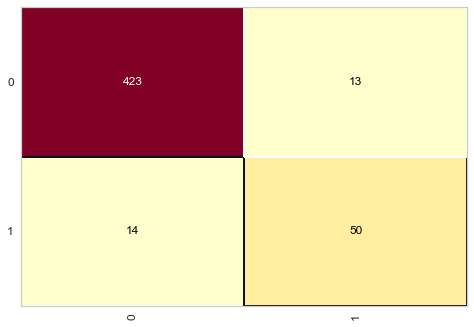

In [142]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [143]:
print(classification_report(y_teste, previsoes2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



### Support Vector Machines (SVM)

In [144]:
from sklearn.svm import SVC

In [145]:
X_treinamento.shape

(1500, 3)

In [146]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_treinamento, y_treinamento)

SVC(C=2.0, random_state=1)

In [147]:
previsoes = svm_credit.predict(X_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

0.988

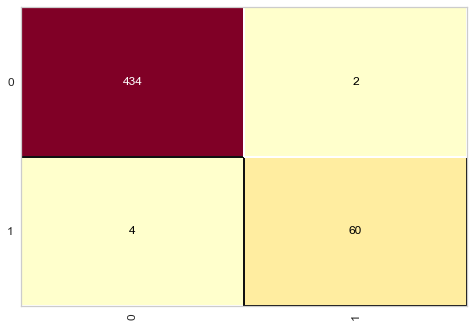

In [148]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [149]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Redes Neurais
<br />

##### Aplicações
<br />

- Descoberta de novos remédios
- Linguagem Natural
- Carro autônomo 
- Reconhecimento Facil
- Bolsas de Valores
- Controle de Tráfego
- Cura para Doenças

<br />

*  Utilizados para muitos dados e problemas complexos

<br />

##### Objetivos

1. O Objetivo das Redes Neurais, é imitar o sistema nervoso humano (_sendo ela inpirada pelo sistema nervoso humano, para que seja realizado a troca de informações_)

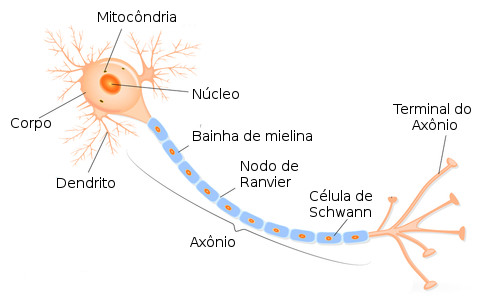

In [152]:
from IPython.display import display
from PIL import Image

# Estrutura base de um neurônio biológico

img = Image.open('./img/estrutura-neuronio.jpg')
img